In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [7]:
# neural network features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'euclidean')

In [8]:
# neural network features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'euclidean')

In [9]:
# color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [10]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [11]:
# color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [12]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [13]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'euclidean')

In [14]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'euclidean')

In [15]:
# HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [3]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [17]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'euclidean')

In [4]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [19]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'euclidean')

# Test retrieval

In [129]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])




In [249]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/red_black.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...


## Neural network

In [250]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [251]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [252]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [253]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [254]:
distances

[6.703730583190918,
 6.8924994468688965,
 6.960562229156494,
 7.007338047027588,
 7.059990406036377,
 7.091196537017822,
 7.141749382019043,
 7.148058891296387,
 7.15317964553833,
 7.192981719970703]

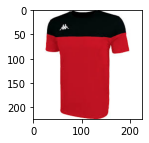

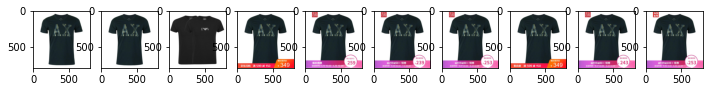

array(['3772.jpg', '3770.jpg', '6154.jpg', '3766.jpg', '3768.jpg',
       '3773.jpg', '3775.jpg', '3765.jpg', '3767.jpg', '3774.jpg'],
      dtype=object)

In [255]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network PCA

In [256]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [257]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [258]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [259]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [260]:
distances

[6.1221923828125,
 6.295872211456299,
 6.413232326507568,
 6.424015998840332,
 6.471866130828857,
 6.507231712341309,
 6.5607171058654785,
 6.561023235321045,
 6.569310188293457,
 6.6161088943481445]

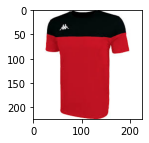

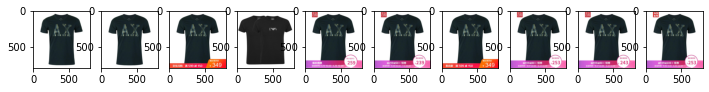

array(['3772.jpg', '3770.jpg', '3766.jpg', '6154.jpg', '3768.jpg',
       '3773.jpg', '3765.jpg', '3775.jpg', '3767.jpg', '3774.jpg'],
      dtype=object)

In [261]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [262]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [263]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [264]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [265]:
distances

[1.0950636863708496,
 1.2114721536636353,
 1.2180944681167603,
 1.244667649269104,
 1.245525598526001,
 1.2603795528411865,
 1.296862244606018,
 1.2994977235794067,
 1.3080825805664062,
 1.3103585243225098]

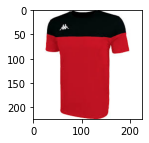

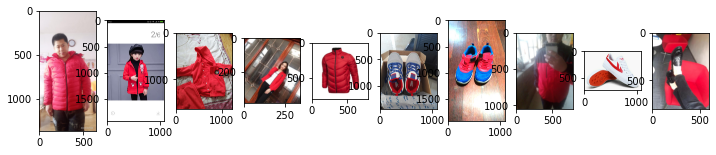

array(['3314.jpg', '1029.jpg', '2826.jpg', '287.jpg', '5627.jpg',
       '19159.jpg', '21893.jpg', '6580.jpg', '27914.jpg', '18744.jpg'],
      dtype=object)

In [266]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [267]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [268]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [269]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [270]:
distances

[0.542536199092865,
 0.6167183518409729,
 0.6172001957893372,
 0.6326781511306763,
 0.639723539352417,
 0.6918594837188721,
 0.7156798243522644,
 0.762292206287384,
 0.7666826248168945,
 0.7762207984924316]

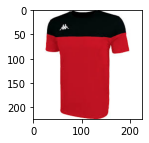

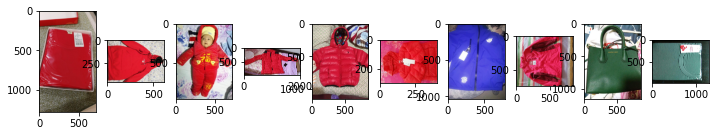

array(['1201.jpg', '723.jpg', '6573.jpg', '3313.jpg', '3066.jpg',
       '6200.jpg', '6631.jpg', '3840.jpg', '28320.jpg', '3189.jpg'],
      dtype=object)

In [271]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [272]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [273]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [274]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [275]:
distances

[0.6101242303848267,
 0.637212872505188,
 1.3561984300613403,
 1.397607445716858,
 1.4556002616882324,
 1.579136610031128,
 1.5991928577423096,
 1.6044995784759521,
 1.623231053352356,
 1.6477875709533691]

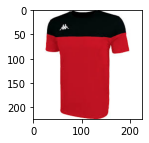

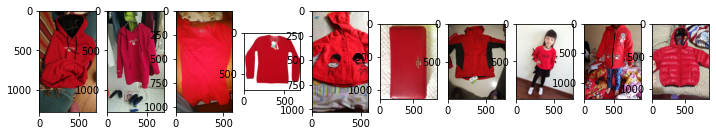

array(['720.jpg', '718.jpg', '3427.jpg', '6539.jpg', '1982.jpg',
       '34206.jpg', '6097.jpg', '4646.jpg', '913.jpg', '3066.jpg'],
      dtype=object)

In [276]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [277]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [278]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [279]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [280]:
distances

[1.8090318441390991,
 1.8759548664093018,
 1.9617877006530762,
 2.0311460494995117,
 2.2089996337890625,
 2.2986550331115723,
 2.306955099105835,
 2.329272508621216,
 2.3377456665039062,
 2.366018295288086]

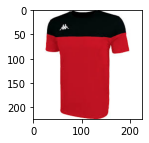

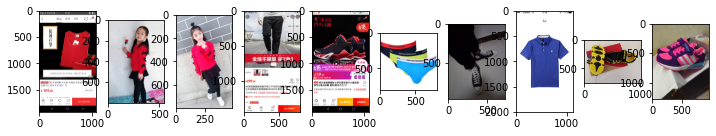

array(['1191.jpg', '4640.jpg', '4648.jpg', '12587.jpg', '19824.jpg',
       '4116.jpg', '27730.jpg', '6506.jpg', '16926.jpg', '17873.jpg'],
      dtype=object)

In [281]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [282]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [283]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [284]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [285]:
distances

[8.648652076721191,
 8.665106773376465,
 8.679132461547852,
 8.686332702636719,
 8.709519386291504,
 8.71933364868164,
 8.752245903015137,
 8.770780563354492,
 8.835549354553223,
 8.84465503692627]

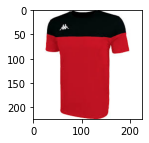

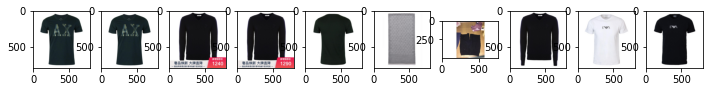

array(['3772.jpg', '3770.jpg', '6448.jpg', '795.jpg', '3769.jpg',
       '5373.jpg', '11737.jpg', '793.jpg', '2529.jpg', '1750.jpg'],
      dtype=object)

In [286]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [287]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [288]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [289]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [290]:
distances

[8.040645599365234,
 8.1058931350708,
 8.137011528015137,
 8.210229873657227,
 8.21773624420166,
 8.21773624420166,
 8.22572135925293,
 8.253664016723633,
 8.256022453308105,
 8.297528266906738]

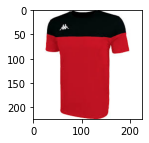

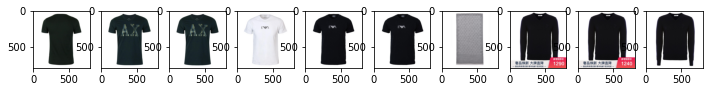

array(['3769.jpg', '3772.jpg', '3770.jpg', '2529.jpg', '1750.jpg',
       '2219.jpg', '5373.jpg', '795.jpg', '6448.jpg', '793.jpg'],
      dtype=object)

In [291]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [292]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [293]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [294]:
img_features_merged_pca.shape

(1099,)

In [295]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [296]:
distances

[7.185324192047119,
 7.187074184417725,
 7.3302083015441895,
 7.3302083015441895,
 7.33753776550293,
 7.436983585357666,
 7.55170202255249,
 7.559978008270264,
 7.688903331756592,
 7.712577819824219]

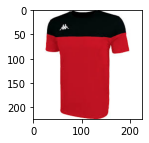

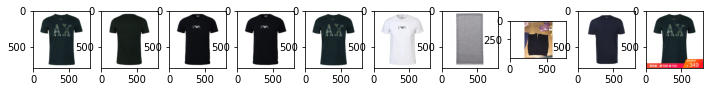

array(['3772.jpg', '3769.jpg', '1750.jpg', '2219.jpg', '3770.jpg',
       '2529.jpg', '5373.jpg', '11737.jpg', '3931.jpg', '3765.jpg'],
      dtype=object)

In [297]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [298]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [299]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [300]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [301]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [302]:
# distances

In [303]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [304]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [305]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [306]:
# img_features_merged_pca.shape

In [307]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [308]:
distances

[7.185324192047119,
 7.187074184417725,
 7.3302083015441895,
 7.3302083015441895,
 7.33753776550293,
 7.436983585357666,
 7.55170202255249,
 7.559978008270264,
 7.688903331756592,
 7.712577819824219]

In [309]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [310]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [311]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [312]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [313]:
# distances

In [314]:
# # show retrieval results
# show_images(indexes, df_names)